In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

In [21]:
def getTrainingData(path, label):
    trainImages = []
    
    for file in os.listdir(path):
        if file == 'desktop.ini' or file == '.ipynb_checkpoints':
            continue
            
        filePath = os.path.join(path, file)
        img = cv.imread(filePath)
        img = cv.resize(img, (64, 64))
        trainImages.append([img, label])
        
    return np.array(trainImages)

In [4]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [23]:
matang = getTrainingData('data/prepos/single/matang', [0 ,0, 0, 1])
mentah = getTrainingData('data/prepos/single/mentah', [1, 0, 0, 0])
setmang = getTrainingData('data/prepos/single/setengah matang', [0, 0, 1, 0])
training_images = np.concatenate((mentah, setmang, matang), axis = 0)
training_data = np.array([i[0] for i in training_images])
training_label = np.array([i[1] for i in training_images])

In [24]:
model = Sequential()

model.add(InputLayer(input_shape = [64, 64, 3]))
model.add(Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = 5, padding = 'same'))

model.add(Conv2D(filters = 50, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = 5, padding = 'same'))

model.add(Conv2D(filters = 80, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = 5, padding = 'same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer = Adam(lr = 0.25), loss = 'mse', metrics=['accuracy'])
model.fit(x = training_data, y = training_label, epochs = 20, batch_size = 10)
model.summary()

Epoch 1/20
14/14 [==============================] - 4s 281ms/step - loss: 0.2827 - acc: 0.4286
Epoch 2/20
14/14 [==============================] - 1s 69ms/step - loss: 0.3214 - acc: 0.3571
Epoch 3/20
14/14 [==============================] - 1s 57ms/step - loss: 0.3214 - acc: 0.3571
Epoch 4/20
14/14 [==============================] - 1s 77ms/step - loss: 0.3214 - acc: 0.3571
Epoch 5/20
14/14 [==============================] - 1s 65ms/step - loss: 0.3214 - acc: 0.3571
Epoch 6/20
14/14 [==============================] - 1s 59ms/step - loss: 0.3214 - acc: 0.3571
Epoch 7/20
14/14 [==============================] - 1s 64ms/step - loss: 0.3214 - acc: 0.3571
Epoch 8/20
14/14 [==============================] - 1s 63ms/step - loss: 0.3214 - acc: 0.3571
Epoch 9/20
14/14 [==============================] - 1s 47ms/step - loss: 0.3214 - acc: 0.3571
Epoch 10/20
14/14 [==============================] - 1s 67ms/step - loss: 0.3214 - acc: 0.3571
Epoch 11/20
14/14 [==============================] - 1s 87

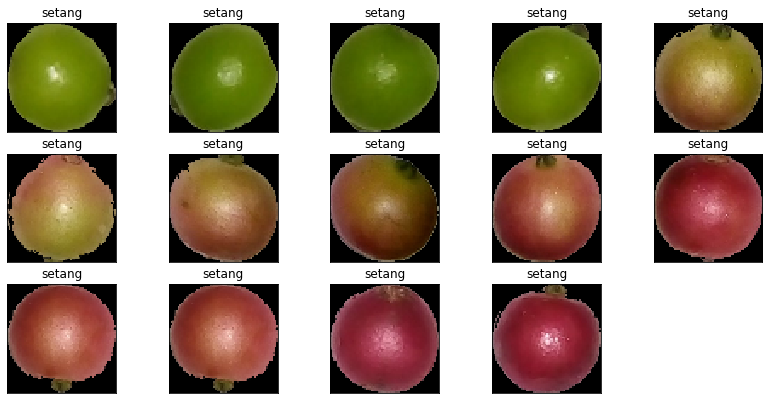

In [25]:
fig = plt.figure(figsize = (14, 14))
indeks = ['mentah', 'setah', 'setang', 'matang']

for counter, data in enumerate(training_data):
    y = fig.add_subplot(6, 5, counter + 1)
    img = training_data[counter]
    output = model.predict([img.reshape(-1, 64, 64, 3)])
    
    y.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(indeks[np.argmax(output)])
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)